# Iris 데이터 clustering

## 데이터셋

In [34]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [35]:
cols = [each[:-5] for each in iris.feature_names]

cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [36]:
iris_df = pd.DataFrame(iris.data, columns=cols)

iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
feature = iris_df[['petal length', 'petal width']]

feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


## Clustering

In [38]:
model = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=13)

model.fit(feature)

/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=13)

### 모델 예측 결과

In [39]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### 군집 중심값 확인

In [40]:
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

## 시각화

In [41]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])

feature = pd.concat([feature, predict], axis=1)

feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


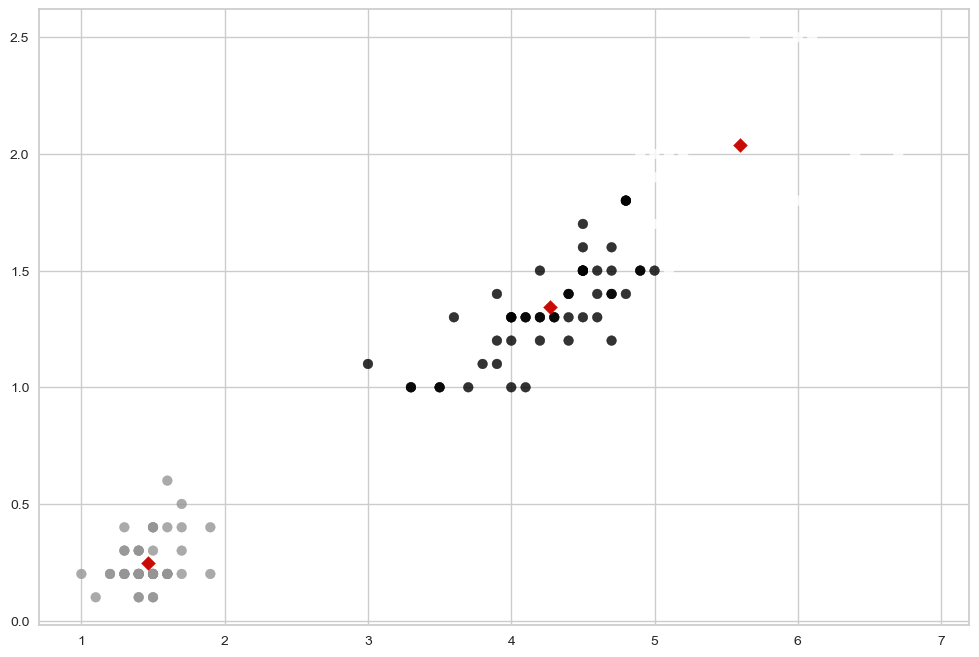

In [42]:
centers = pd.DataFrame(model.cluster_centers_,
                       columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.figure(figsize=(12, 8))

# petal length, petal width 데이터 포인트 시각화
plt.scatter(feature['petal length'], feature['petal width'],
            c=feature['cluster'], alpha=0.8)

# centroid 중심점 시각화
plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

## 군집 평가
### 실루엣 점수

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, feature['cluster'])
score_values = silhouette_samples(iris.data, feature['cluster'])

print('avg_value : ', avg_value)
print('silhouette_samples() return 값의 shape : ', score_values.shape)

avg_value :  0.5221721385945111
silhouette_samples() return 값의 shape :  (150,)


### 실루엣 그래프 시각화

In [49]:
feature.iloc[:, 0:-1]

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


/Users/taeheon/miniforge3/envs/eda_study/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


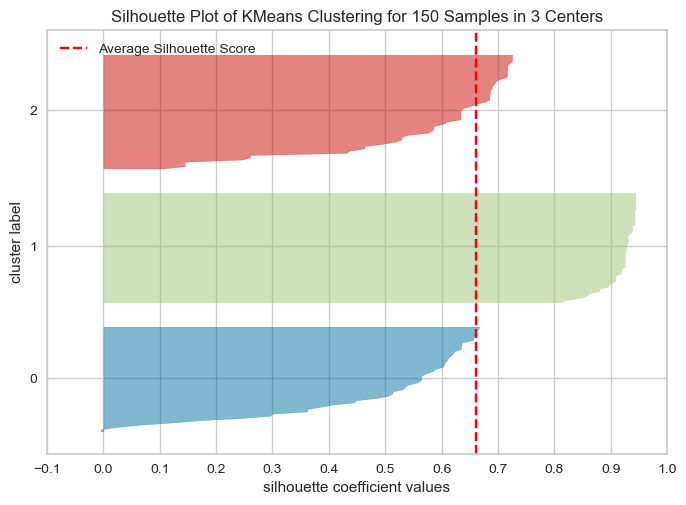

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=13))

In [50]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(model, feature.iloc[:, 0:-1], colors='yellowbrick')